<a href="https://colab.research.google.com/github/cmaguire001/instacart-feature-flag-analysis/blob/main/Instacart_Feature_Flag_Analysis%20milestone%209%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# @title
import pandas as pd

orders = pd.read_csv('/content/orders.csv')
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1.0,prior,1.0,2.0,8.0,NaN
1,2398795,1.0,prior,2.0,3.0,7.0,15.0
2,473747,1.0,prior,3.0,3.0,12.0,21.0
3,2254736,1.0,prior,4.0,4.0,7.0,29.0
4,431534,1.0,prior,5.0,4.0,15.0,28.0


In [7]:
# @title
orders.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774033 entries, 0 to 774032
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                774033 non-null  int64  
 1   user_id                 774032 non-null  float64
 2   eval_set                774032 non-null  object 
 3   order_number            774032 non-null  float64
 4   order_dow               774032 non-null  float64
 5   order_hour_of_day       774032 non-null  float64
 6   days_since_prior_order  727525 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.3+ MB


In [8]:
# @title
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1.0,prior,1.0,2.0,8.0,NaN
1,2398795,1.0,prior,2.0,3.0,7.0,15.0
2,473747,1.0,prior,3.0,3.0,12.0,21.0
3,2254736,1.0,prior,4.0,4.0,7.0,29.0
4,431534,1.0,prior,5.0,4.0,15.0,28.0
5,3367565,1.0,prior,6.0,2.0,7.0,19.0
6,550135,1.0,prior,7.0,1.0,9.0,20.0
7,3108588,1.0,prior,8.0,1.0,14.0,14.0
8,2295261,1.0,prior,9.0,1.0,16.0,0.0
9,2550362,1.0,prior,10.0,4.0,8.0,30.0


In [9]:
# @title
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774033 entries, 0 to 774032
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                774033 non-null  int64  
 1   user_id                 774032 non-null  float64
 2   eval_set                774032 non-null  object 
 3   order_number            774032 non-null  float64
 4   order_dow               774032 non-null  float64
 5   order_hour_of_day       774032 non-null  float64
 6   days_since_prior_order  727525 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.3+ MB


In [10]:
# @title
# Count how many orders happen on each day of the week
orders_by_day = orders['order_dow'].value_counts().sort_index()

# Map numbers to weekdays for clarity
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
            4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

orders_by_day.index = orders_by_day.index.map(weekdays)

print(orders_by_day)



order_dow
Sunday       135883
Monday       132594
Tuesday      105607
Wednesday     98977
Thursday      96401
Friday       102740
Saturday     101830
Name: count, dtype: int64


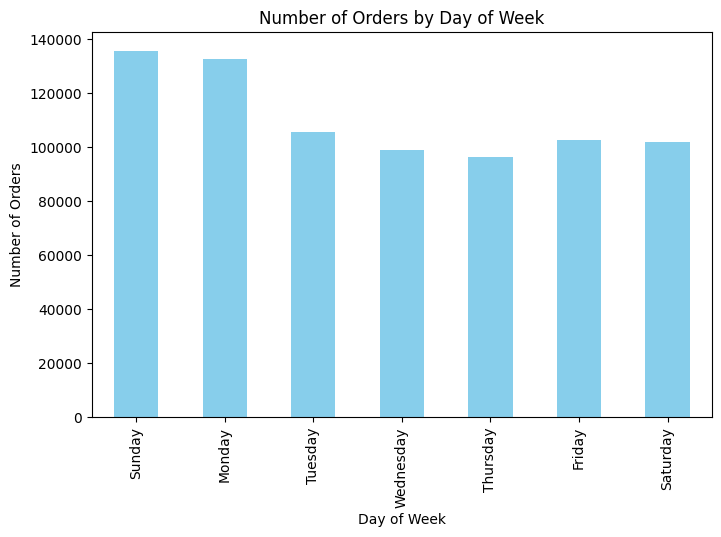

In [11]:
# @title
import matplotlib.pyplot as plt

orders_by_day.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Number of Orders by Day of Week')
plt.ylabel('Number of Orders')
plt.xlabel('Day of Week')
plt.show()


In [12]:
# @title
# Count orders by hour
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Print the result
print(orders_by_hour)


order_hour_of_day
0.0      4998
1.0      2706
2.0      1680
3.0      1221
4.0      1292
5.0      2140
6.0      6926
7.0     21020
8.0     40750
9.0     58190
10.0    64955
11.0    64202
12.0    62109
13.0    63274
14.0    64044
15.0    64101
16.0    61602
17.0    51709
18.0    41346
19.0    31824
20.0    23419
21.0    17703
22.0    13889
23.0     8932
Name: count, dtype: int64


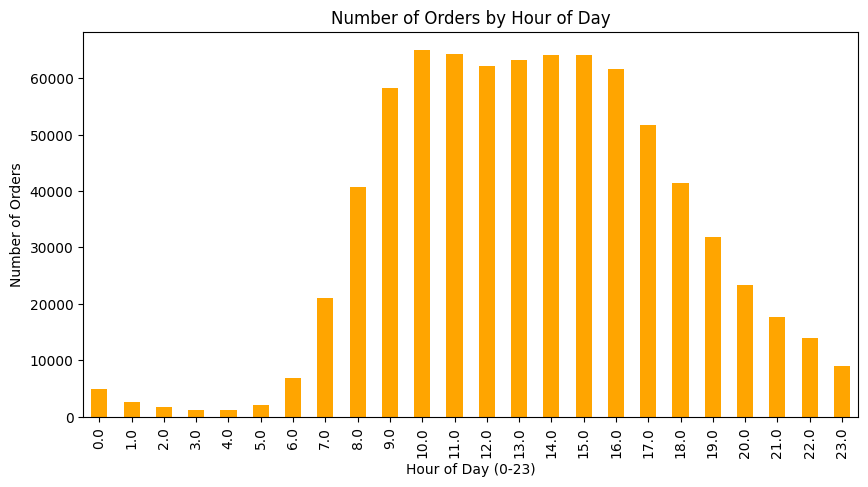

In [13]:
# @title
orders_by_hour.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.show()


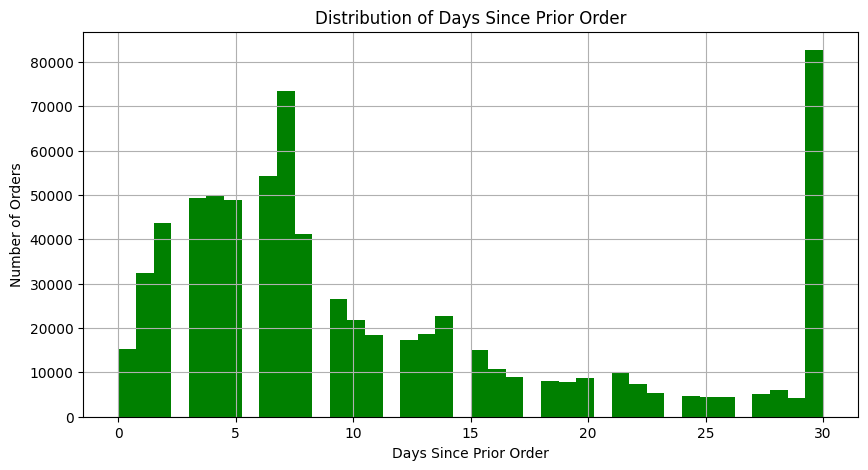

In [14]:
# @title
# Check distribution of days since prior order
import matplotlib.pyplot as plt

orders['days_since_prior_order'].hist(bins=40, color='green', figsize=(10,5))
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.show()


In [15]:
# @title
import numpy as np

# Get all unique users
users = orders['user_id'].unique()

# Randomly assign each user to control or treatment
np.random.seed(42)  # for reproducibility
user_flags = pd.DataFrame({
    'user_id': users,
    'feature_flag': np.random.choice(['control', 'treatment'], size=len(users))
})

user_flags.head()


,user_id,feature_flag
0,1.0,control
1,2.0,treatment
2,3.0,control
3,4.0,control
4,5.0,control


In [16]:
# @title
# Merge the feature flag assignment into the orders table
orders_flagged = orders.merge(user_flags, on='user_id', how='left')

orders_flagged.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,feature_flag
0,2539329,1.0,prior,1.0,2.0,8.0,NaN,control
1,2398795,1.0,prior,2.0,3.0,7.0,15.0,control
2,473747,1.0,prior,3.0,3.0,12.0,21.0,control
3,2254736,1.0,prior,4.0,4.0,7.0,29.0,control
4,431534,1.0,prior,5.0,4.0,15.0,28.0,control


In [17]:
# @title
# Calculate average days_since_prior_order for control vs treatment
avg_days = orders_flagged.groupby('feature_flag')['days_since_prior_order'].mean()
print(avg_days)


feature_flag
control      11.044463
treatment    11.137856
Name: days_since_prior_order, dtype: float64


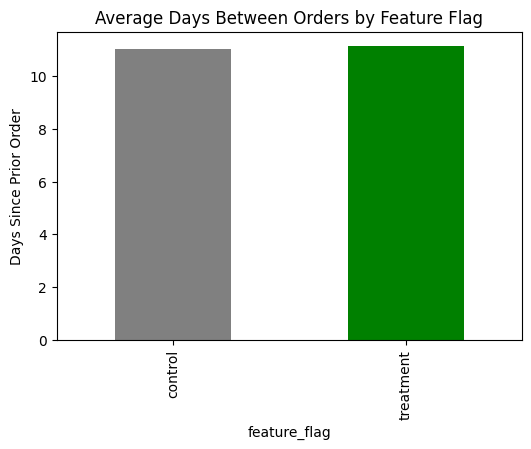

In [18]:
# @title
avg_days.plot(kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Days Since Prior Order')
plt.show()


In [19]:
# @title
# Group by feature flag
summary = orders_flagged.groupby('feature_flag').agg(
    total_orders=('order_id', 'count'),
    avg_days_between_orders=('days_since_prior_order', 'mean'),
    median_days_between_orders=('days_since_prior_order', 'median'),
    unique_users=('user_id', 'nunique')
).reset_index()

print(summary)


  feature_flag  total_orders  avg_days_between_orders  \
0      control        388674                11.044463   
1    treatment        385359                11.137856   

   median_days_between_orders  unique_users  
0                         7.0         23272  
1                         7.0         23235  


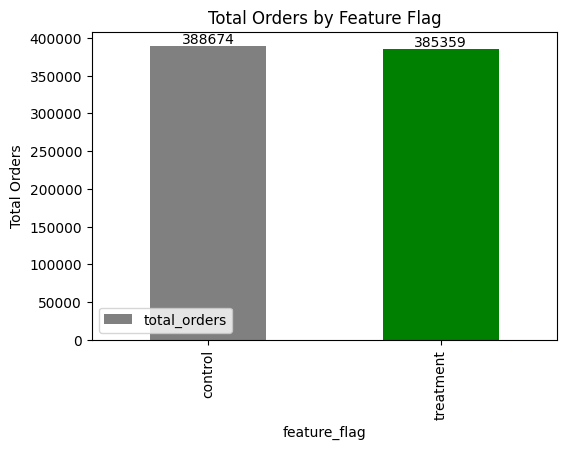

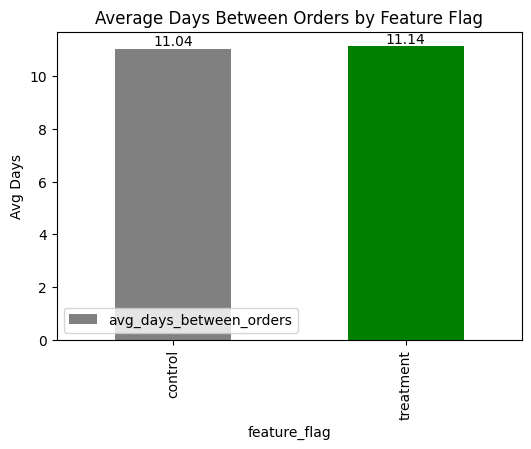

In [20]:
# @title
import matplotlib.pyplot as plt

# Bar plot for total orders
ax1 = summary.plot(x='feature_flag', y='total_orders', kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Total Orders by Feature Flag')
plt.ylabel('Total Orders')

# Add data labels to the first plot
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f')

plt.show()

# Bar plot for average days between orders
ax2 = summary.plot(x='feature_flag', y='avg_days_between_orders', kind='bar', color=['gray','green'], figsize=(6,4))
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Avg Days')

# Add data labels to the second plot
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f')

plt.show()

In [21]:
# @title
# Busiest day of week
orders_by_day = orders['order_dow'].value_counts().sort_index()
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
            4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
orders_by_day.index = orders_by_day.index.map(weekdays)

# Busiest hour of day
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Reorder frequency
avg_days_between_orders = orders['days_since_prior_order'].mean()
median_days_between_orders = orders['days_since_prior_order'].median()

# Feature flag experiment summary (from previous step)
experiment_summary = summary.copy()


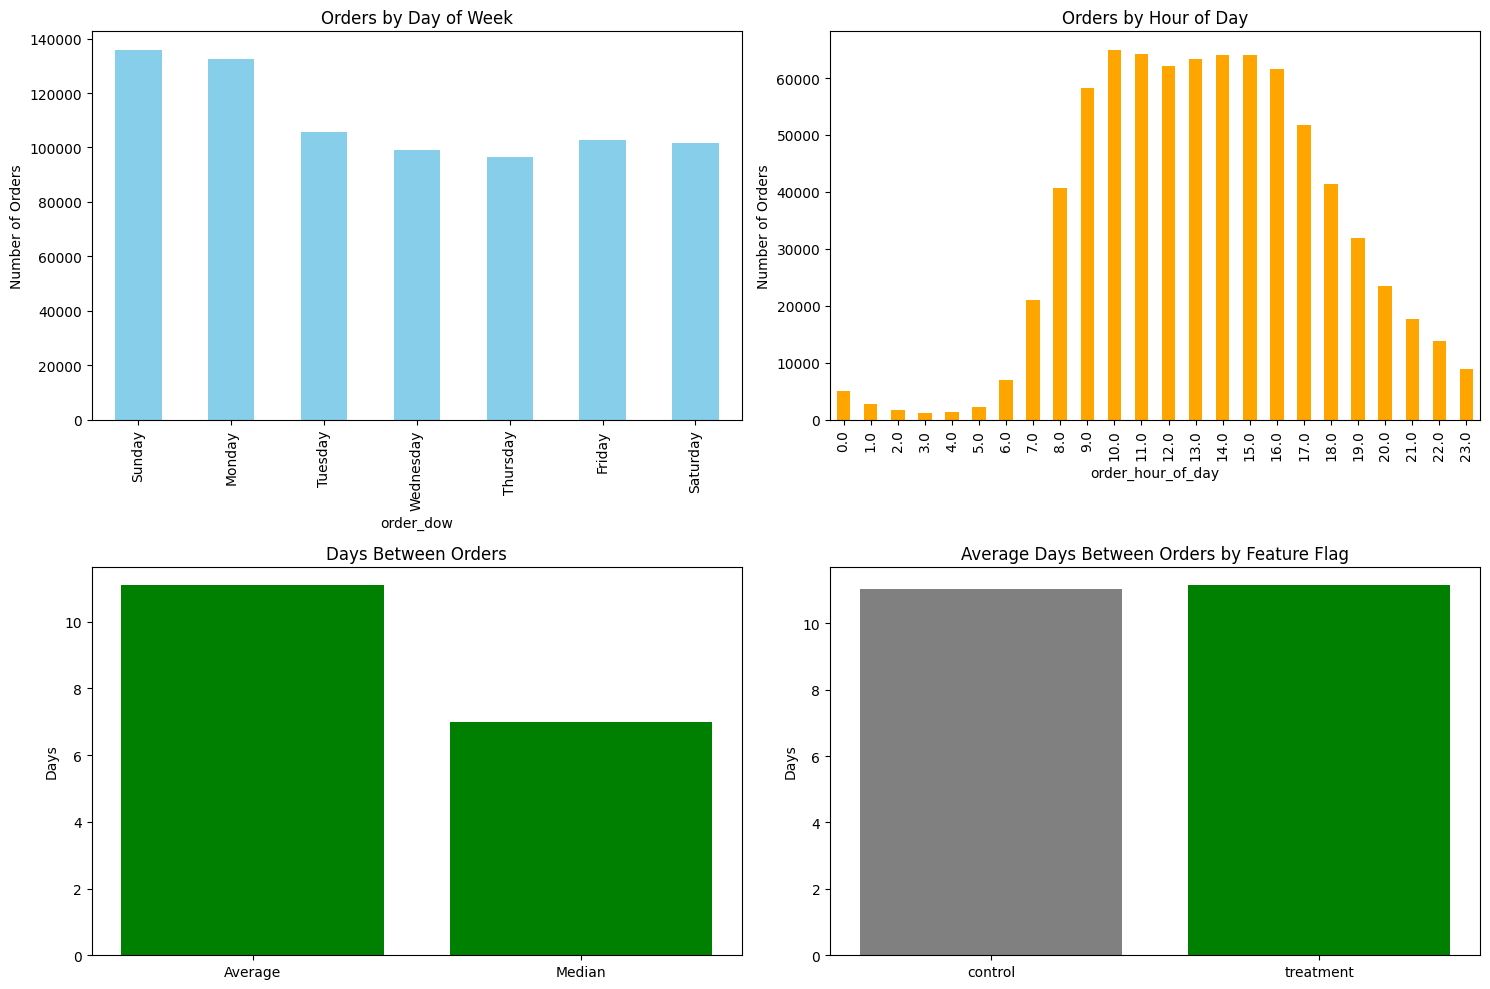

In [22]:
# @title
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Busiest day
plt.subplot(2,2,1)
orders_by_day.plot(kind='bar', color='skyblue')
plt.title('Orders by Day of Week')
plt.ylabel('Number of Orders')

# Busiest hour
plt.subplot(2,2,2)
orders_by_hour.plot(kind='bar', color='orange')
plt.title('Orders by Hour of Day')
plt.ylabel('Number of Orders')

# Reorder frequency
plt.subplot(2,2,3)
plt.bar(['Average','Median'], [avg_days_between_orders, median_days_between_orders], color='green')
plt.title('Days Between Orders')
plt.ylabel('Days')

# Feature flag experiment
plt.subplot(2,2,4)
plt.bar(experiment_summary['feature_flag'], experiment_summary['avg_days_between_orders'], color=['gray','green'])
plt.title('Average Days Between Orders by Feature Flag')
plt.ylabel('Days')

plt.tight_layout()
plt.show()


In [23]:
# @title
!pip install duckdb



In [24]:
# @title
import duckdb

# Create a DuckDB in-memory database
con = duckdb.connect(database=':memory:')

# Load CSV into DuckDB
con.execute("""
CREATE TABLE orders AS
SELECT * FROM read_csv_auto('/content/orders.csv');
""")

# Check the first 5 rows
con.execute("SELECT * FROM orders LIMIT 5").df()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,08,NaN
1,2398795,1,prior,2,3,07,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,07,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
# @title
query_avg_reorder = """
SELECT AVG(days_since_prior_order) AS avg_days_between_orders
FROM orders
WHERE days_since_prior_order IS NOT NULL
"""
avg_reorder = con.execute(query_avg_reorder).df()
avg_reorder



,avg_days_between_orders
0,11.095927


In [26]:
# @title
query_avg_reorder = """
SELECT AVG(days_since_prior_order) AS avg_days_between_orders
FROM orders
WHERE days_since_prior_order IS NOT NULL
"""
avg_reorder = con.execute(query_avg_reorder).df()
avg_reorder


,avg_days_between_orders
0,11.095927


In [27]:
# @title
query_median_reorder = """
SELECT PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY days_since_prior_order) AS median_days_between_orders
FROM orders
WHERE days_since_prior_order IS NOT NULL
"""
median_reorder = con.execute(query_median_reorder).df()
median_reorder


,median_days_between_orders
0,7.0


In [28]:
# @title
import numpy as np
import pandas as pd

# Get unique users
users = con.execute("SELECT DISTINCT user_id FROM orders").df()

# Randomly assign each user to control or treatment
np.random.seed(42)
users['feature_flag'] = np.random.choice(['control', 'treatment'], size=len(users))

# Create a DuckDB table from this
con.register('user_flags', users)


In [29]:
# @title
con.execute("""
CREATE TABLE orders_flagged AS
SELECT o.*, u.feature_flag
FROM orders o
LEFT JOIN user_flags u
ON o.user_id = u.user_id
""")


In [30]:
# @title
query_flag = """
SELECT feature_flag,
       AVG(days_since_prior_order) AS avg_days_between_orders,
       PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY days_since_prior_order) AS median_days_between_orders,
       COUNT(*) AS total_orders,
       COUNT(DISTINCT user_id) AS unique_users
FROM orders_flagged
WHERE days_since_prior_order IS NOT NULL
GROUP BY feature_flag
"""
experiment_summary = con.execute(query_flag).df()
experiment_summary


,feature_flag,avg_days_between_orders,median_days_between_orders,total_orders,unique_users
0,control,11.159614,7.0,470065,30347
1,treatment,11.033192,7.0,477196,30213


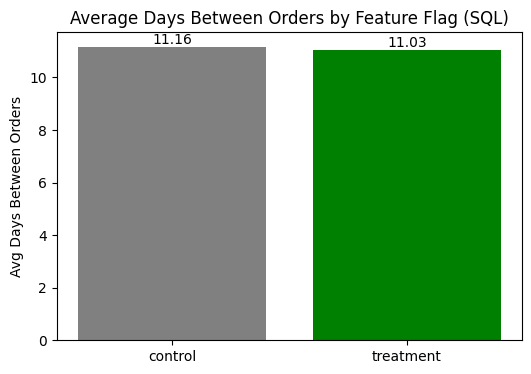

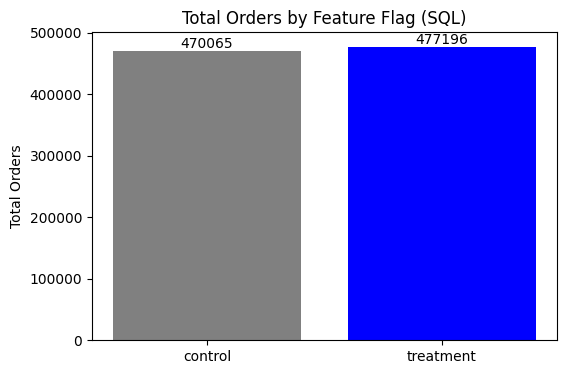

In [32]:
# @title
import matplotlib.pyplot as plt

# Plot for Average Days Between Orders
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.bar(experiment_summary['feature_flag'], experiment_summary['avg_days_between_orders'], color=['gray','green'])
ax1.set_title('Average Days Between Orders by Feature Flag (SQL)')
ax1.set_ylabel('Avg Days Between Orders')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.2f') # Format for float with 2 decimal places
plt.show()

# Plot for Total Orders
fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.bar(experiment_summary['feature_flag'], experiment_summary['total_orders'], color=['gray','blue'])
ax2.set_title('Total Orders by Feature Flag (SQL)')
ax2.set_ylabel('Total Orders')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f') # Format for integer
plt.show()

In [33]:
# @title
# Get unique users again (just to be safe)
users = con.execute("SELECT DISTINCT user_id FROM orders").df()

np.random.seed(42)

# Randomly assign first feature flag: recommendation engine
users['feature_flag_reco'] = np.random.choice(['control', 'treatment'], size=len(users))

# Randomly assign second feature flag: loyalty discount
users['feature_flag_loyalty'] = np.random.choice(['control', 'treatment'], size=len(users))

# Register the new table in DuckDB
con.register('user_flags_multi', users)


In [34]:
# @title
con.execute("""
CREATE TABLE orders_flagged_multi AS
SELECT o.*, u.feature_flag_reco, u.feature_flag_loyalty
FROM orders o
LEFT JOIN user_flags_multi u
ON o.user_id = u.user_id
""")


In [35]:
# @title
query_multi_flag = """
SELECT feature_flag_reco,
       feature_flag_loyalty,
       AVG(days_since_prior_order) AS avg_days_between_orders,
       COUNT(*) AS total_orders,
       COUNT(DISTINCT user_id) AS unique_users
FROM orders_flagged_multi
WHERE days_since_prior_order IS NOT NULL
GROUP BY feature_flag_reco, feature_flag_loyalty
ORDER BY feature_flag_reco, feature_flag_loyalty
"""
multi_flag_summary = con.execute(query_multi_flag).df()
multi_flag_summary


,feature_flag_reco,feature_flag_loyalty,avg_days_between_orders,total_orders,unique_users
0,control,control,11.020690,237799,15034
1,control,treatment,11.108611,237978,15313
2,treatment,control,11.083949,235666,15013
3,treatment,treatment,11.170967,235818,15200


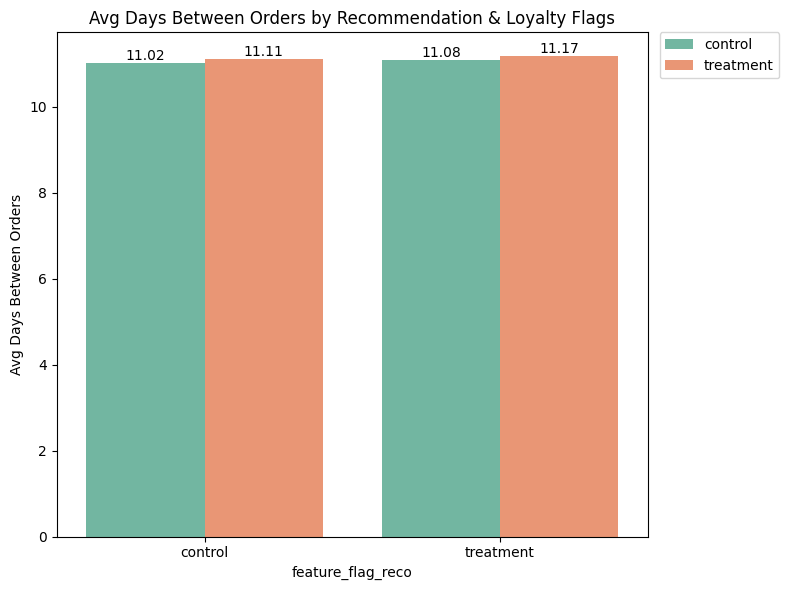

In [37]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax = sns.barplot(data=multi_flag_summary, x='feature_flag_reco', y='avg_days_between_orders', hue='feature_flag_loyalty', palette='Set2')
plt.title('Avg Days Between Orders by Recommendation & Loyalty Flags')
plt.ylabel('Avg Days Between Orders')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Move the legend outside the plot area
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout() # Adjust plot to prevent labels/legend from being cut off
plt.show()

In [38]:
# @title
# Create a table with average days between orders per user
con.execute("""
CREATE TABLE user_avg_reorder AS
SELECT user_id,
       AVG(days_since_prior_order) AS avg_days_between_orders
FROM orders_flagged_multi
WHERE days_since_prior_order IS NOT NULL
GROUP BY user_id
""")

# Segment users: High-frequency (<30 days), Low-frequency (>=30 days)
con.execute("""
CREATE TABLE user_segments AS
SELECT *,
       CASE
           WHEN avg_days_between_orders < 30 THEN 'high_frequency'
           ELSE 'low_frequency'
       END AS user_segment
FROM user_avg_reorder
""")


In [39]:
# @title
con.execute("""
CREATE TABLE orders_with_segments AS
SELECT o.*, s.user_segment
FROM orders_flagged_multi o
LEFT JOIN user_segments s
ON o.user_id = s.user_id
""")


In [40]:
# @title
query_segments = """
SELECT user_segment,
       feature_flag_reco,
       feature_flag_loyalty,
       AVG(days_since_prior_order) AS avg_days_between_orders,
       COUNT(*) AS total_orders
FROM orders_with_segments
WHERE days_since_prior_order IS NOT NULL
GROUP BY user_segment, feature_flag_reco, feature_flag_loyalty
ORDER BY user_segment, feature_flag_reco, feature_flag_loyalty
"""
segment_summary = con.execute(query_segments).df()
segment_summary


,user_segment,feature_flag_reco,feature_flag_loyalty,avg_days_between_orders,total_orders
0,high_frequency,control,control,10.908048,236396
1,high_frequency,control,treatment,10.991112,236507
2,high_frequency,treatment,control,10.968630,234238
3,high_frequency,treatment,treatment,11.043879,234237
4,low_frequency,control,control,30.000000,1403
5,low_frequency,control,treatment,30.000000,1471
6,low_frequency,treatment,control,30.000000,1428
7,low_frequency,treatment,treatment,30.000000,1581


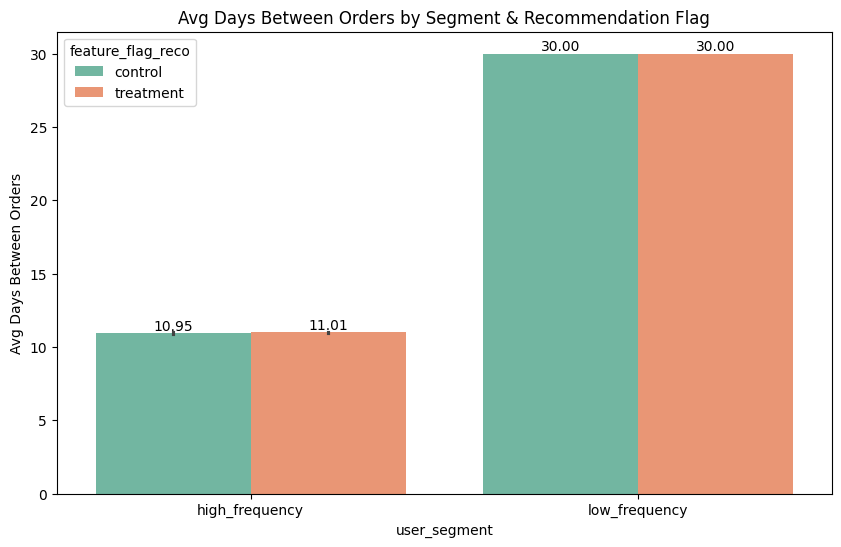

In [42]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=segment_summary,
    x='user_segment',
    y='avg_days_between_orders',
    hue='feature_flag_reco',
    palette='Set2'
)
plt.title('Avg Days Between Orders by Segment & Recommendation Flag')
plt.ylabel('Avg Days Between Orders')

# Add data labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

In [43]:
# @title
# Add a 'first_order_week' column to each order
con.execute("""
CREATE TABLE orders_with_cohort AS
SELECT *,
       MIN(order_number) OVER (PARTITION BY user_id) AS first_order_number,
       MIN(order_id) OVER (PARTITION BY user_id) AS first_order_id
FROM orders_with_segments
""")


In [45]:
# @title
query_retention = """
SELECT first_order_number AS cohort,
       order_number - first_order_number AS weeks_since_first_order,
       COUNT(DISTINCT user_id) AS retained_users
FROM orders_with_cohort
GROUP BY cohort, weeks_since_first_order
ORDER BY cohort, weeks_since_first_order
"""
retention_summary = con.execute(query_retention).df()
retention_summary


,cohort,weeks_since_first_order,retained_users
0,1,0,60560
1,1,1,60560
2,1,2,60560
3,1,3,60560
4,1,4,53439
...,...,...,...
95,1,95,459
96,1,96,440
97,1,97,428
98,1,98,419


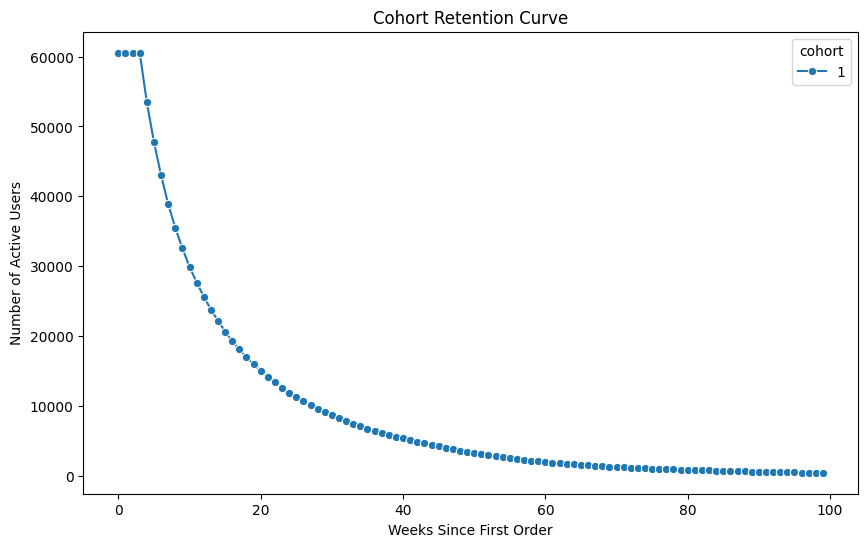

In [46]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(
    data=retention_summary,
    x='weeks_since_first_order',
    y='retained_users',
    hue='cohort',
    marker='o'
)
plt.title('Cohort Retention Curve')
plt.xlabel('Weeks Since First Order')
plt.ylabel('Number of Active Users')
plt.show()


In [56]:
import pandas as pd

# Create user-level features
user_features = con.execute("""
SELECT
    user_id,
    AVG(days_since_prior_order) AS avg_days_between_orders,
    COUNT(*) AS total_orders,
    MAX(CASE WHEN feature_flag_reco='treatment' THEN 1 ELSE 0 END) AS reco_flag,
    MAX(CASE WHEN feature_flag_loyalty='treatment' THEN 1 ELSE 0 END) AS loyalty_flag,
    MAX(CASE WHEN user_segment='high_frequency' THEN 1 ELSE 0 END) AS high_freq_user,
    MIN(days_since_prior_order) AS next_order_days  -- use next order as target
FROM orders_with_segments
WHERE days_since_prior_order IS NOT NULL
GROUP BY user_id
""").df()

user_features.head()


,user_id,avg_days_between_orders,total_orders,reco_flag,loyalty_flag,high_freq_user,next_order_days
0,1,19.000000,10,0,0,1,0.0
1,3,12.000000,12,1,0,1,7.0
2,6,13.333333,3,0,0,1,6.0
3,10,21.800000,5,0,0,1,12.0
4,11,18.714286,7,1,1,1,7.0


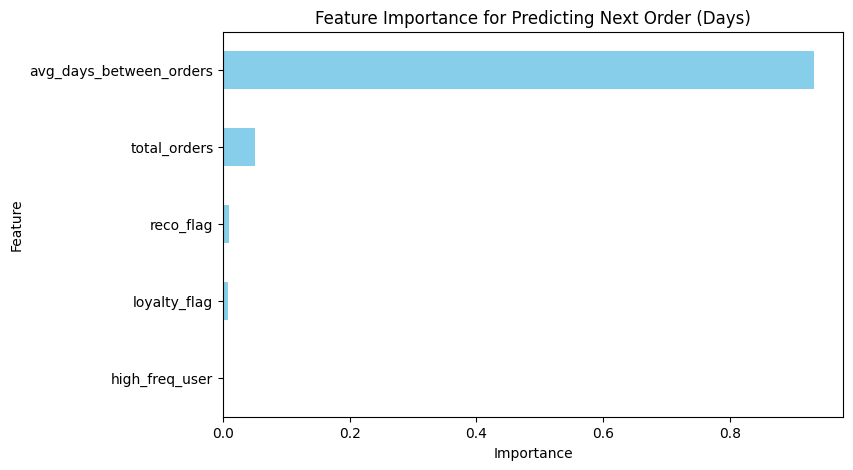

In [60]:
import matplotlib.pyplot as plt

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
feat_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance for Predicting Next Order (Days)')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.show()

This chart means that the user's historical average days between their orders is by far the strongest predictor of how many days it will be until their next order. This makes intuitive sense. Past behavior is a very strong indicator of future behavior for this metric.